<a href="https://colab.research.google.com/github/jeha100/google_drive/blob/main/temp/chapter_6_3_%ED%95%98%EC%A7%80%EC%9D%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PCA 
- 차원축소의 개념
- PCA 개념 

In [ ]:
- 양적 데이터사이의 분산-공

In [1]:
!wget https://bit.ly/fruits_300_data -O fruits_300.npy

--2022-03-31 06:16:10--  https://bit.ly/fruits_300_data
Resolving bit.ly (bit.ly)... 67.199.248.11, 67.199.248.10
Connecting to bit.ly (bit.ly)|67.199.248.11|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy [following]
--2022-03-31 06:16:10--  https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy [following]
--2022-03-31 06:16:10--  https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... conne

- 배열 업로드

In [2]:
import numpy as np

fruits = np.load('fruits_300.npy')
fruits_2d = fruits.reshape(-1, 100*100)# 3차원인데 2차원배열로 reshape 한다.

- sklearn.decomposition 모듈

In [3]:
from sklearn.decomposition import PCA

#PCA 50개 성분으로 300 X 1000 픽셀값을 압축, 학습
pca = PCA(n_components=50) 
pca.fit(fruits_2d) 

PCA(n_components=50)

In [5]:
print(pca.components_.shape) # 배열의 크기

(50, 10000)


- 그래프 그리기

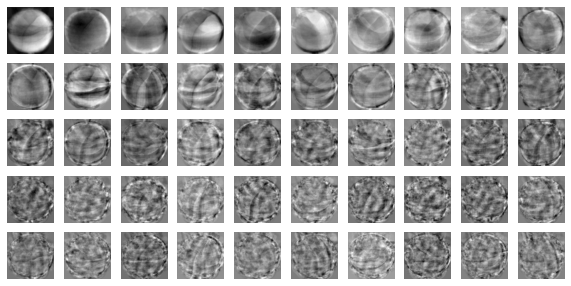

In [7]:
import matplotlib.pyplot as plt

def draw_fruits(arr, ratio=1):
    n = len(arr)    # n은 샘플 개수입니다
    # 한 줄에 10개씩 이미지를 그립니다. 샘플 개수를 10으로 나누어 전체 행 개수를 계산합니다. 
    rows = int(np.ceil(n/10))
    # 행이 1개 이면 열 개수는 샘플 개수입니다. 그렇지 않으면 10개입니다.
    cols = n if rows < 2 else 10
    fig, axs = plt.subplots(rows, cols, 
                            figsize=(cols*ratio, rows*ratio), squeeze=False)
    for i in range(rows):
        for j in range(cols):
            if i*10 + j < n:    # n 개까지만 그립니다.
                axs[i, j].imshow(arr[i*10 + j], cmap='gray_r')
            axs[i, j].axis('off')
    plt.show()
draw_fruits(pca.components_.reshape(-1, 100, 100)) # 압축해서 탁해졌으나 큰 특징들이 남아있음. 원본데이터 의미는 사라짐

In [12]:
#이미지는같으나 픽셀값 줄임 
print(fruits_2d.shape)
fruits_pca = pca.transform(fruits_2d)
print(fruits_pca.shape)

(300, 10000)
(300, 50)


- 데이터의 원래 크기대비해서 1/200 줄임
- 용량이 줄었다는 것과 똑같음
- 

# 원본 데이터 재구성
- 10,000 개의 특성을 50개로 줄임
- 100% 재구성은 어렵지만, 그래도 쓸만하다

In [15]:
fruits_inverse = pca.inverse_transform(fruits_pca)
print(fruits_inverse.shape)# 300 50 -> 돌아옴

(300, 10000)


In [16]:
fruits_reconstruct = fruits_inverse.reshape(-1, 100, 100)

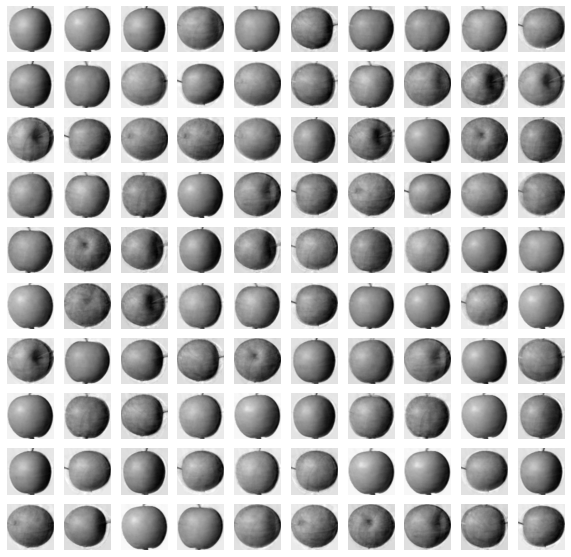

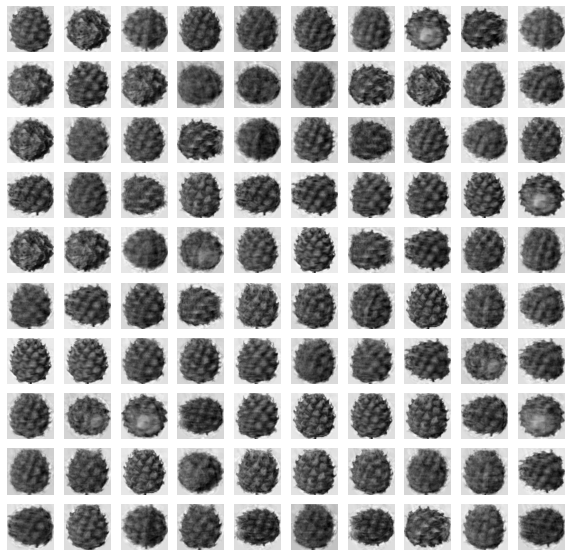

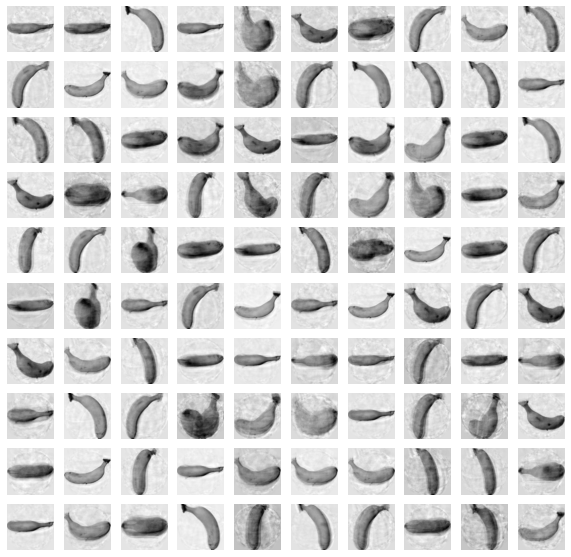

In [17]:
for start in [0, 100, 200]:
    draw_fruits(fruits_reconstruct[start:start+100])
    print("\n")

In [20]:
print(np.sum(pca.explained_variance_ratio_))

0.9215863952924375


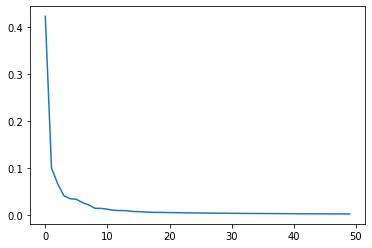

In [19]:
plt.plot(pca.explained_variance_ratio_)

- 처음 10개의 주성분이 대부분의 분산을 표현한다.
- 11개 주성분부터 ~ 50개까지는 잘 설명이 안됨

## 다른 알고리즘과 함께 사용하기 
- 3개의 과일 사진 분류 위해 로지스틱 회귀

In [23]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

# 타깃값 생성# 타겟값 300 0 100 2 200 3 100 
target = np.array([0] * 100 + [1] * 100 + [2] * 100)


- 교차검증 진행

In [24]:
from sklearn.model_selection import cross_validate

scores = cross_validate(lr, fruits_2d, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

0.9966666666666667
1.4145824432373046


In [30]:
pca = PCA(n_components=0.5)
pca.fit(fruits_2d)
print(pca.n_components_)

2


- PCA 수행후, 학습시간 비교

- 주성분을 2개로 압축을 시킴

In [31]:
fruits_pca = pca.transform(fruits_2d)
print(fruits_pca.shape)

(300, 2)


In [32]:
scores = cross_validate(lr, fruits_pca, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


0.9933333333333334
0.06048350334167481


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


- 차원축소된 데이터를 k-평균알고리즘에 추가한다.


In [34]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=3, random_state=42)
km.fit(fruits_pca)
print(np.unique(km.labels_, return_counts=True))


(array([0, 1, 2], dtype=int32), array([110,  99,  91]))


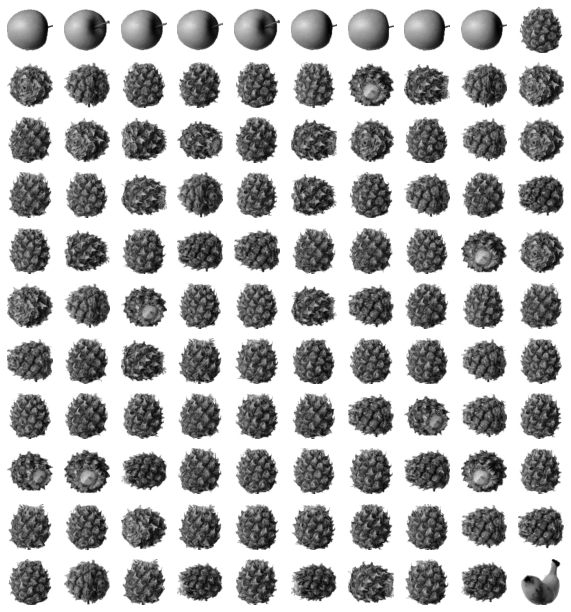

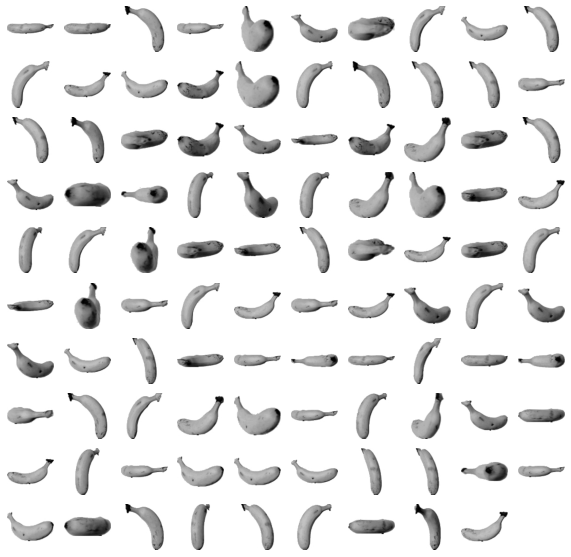

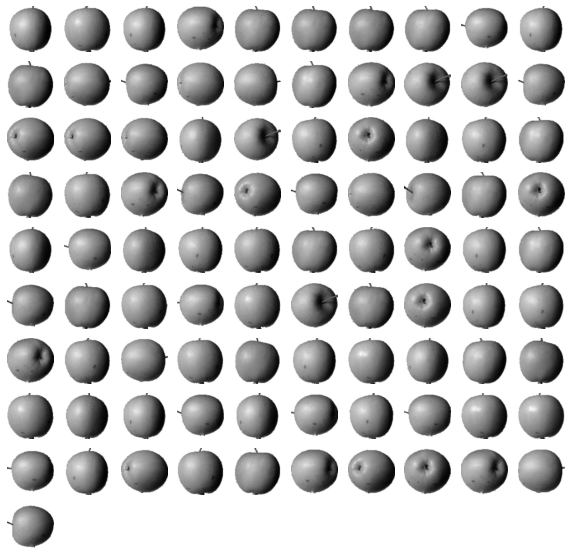

In [36]:
for label in range(0, 3):
    draw_fruits(fruits[km.labels_ == label])
    print("\n")

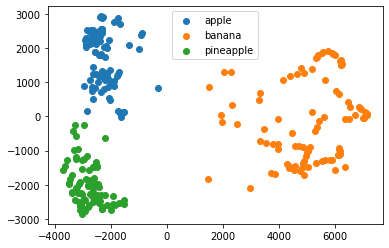

In [37]:
for label in range(0, 3):
    data = fruits_pca[km.labels_ == label]
    plt.scatter(data[:,0], data[:,1])
plt.legend(['apple', 'banana', 'pineapple'])
plt.show()

# 출처 혼자 공부하는 머신러닝+딥러닝